# **3rd DNN**

**3rd network DNN Thinking about**

1.Batch Normalization,
2. Image Normalization,
3. DropOut
4. The distance of MaxPooling from Prediction,
5. The distance of Batch Normalization from Prediction,
6. When do we introduce DropOut, or when do we know we have some overfitting

**This is version 3  **

  Adding Batch normalization in version 2 model for all layers
  Tweaking layer for lower total param
  adding drop out twice of 0.2

*Result*
Sligh over fitting, overall perfomance seems better


installing and Importing Keras for current solution

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing Numpy and Keras modules as well as mnist data set.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading mnist data set in train and test variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Ploting sample from train data set.

(60000, 28, 28)


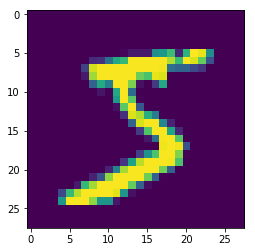

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all train and test data to a uniform size.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Regularizing train and test data for float data type and division wiht 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Visualizing train out put

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Viewing tranformed train out put matrix

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

* Adding Batch normalization in version 1 model for all layers
* Changing layer for lower total param
* Adding drop out twice of 0.2

In [54]:
from keras.layers import Activation, BatchNormalization
model = Sequential()

#Vanilla
''' 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
'''

#1st version 
'''
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 22,22 #RF 9X9
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 20,20 #RF 11X11
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 18,18 #RF 13X13
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 16,16 #RF 15X15
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 14,14 #RF 17X17
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(4, 3, 3, activation='relu')) #input 12,12 #RF 19X19
model.add(BatchNormalization())

model.add(Convolution2D(10, 1)) #input 10,10 
model.add(BatchNormalization())

model.add(Convolution2D(10, 10)) #input 10,10
'''

#2nd version 
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2))) #input 22,22 #RF 14X14
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 11,11 #RF 16X16
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 9)) #input 9X9
'''

#3rd version 
''''''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #input 24,24 #RF 6X6

model.add(Convolution2D(12, 3, 3, activation='relu')) #input 12,12 #RF 8X8
model.add(BatchNormalization())

model.add(Dropout(0.2))

model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 10)) #input 9X9


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:80: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:85: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu")`


Printing model summary to understand current paramaters for the model. 

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_47 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
dropout_11 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_48 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 10, 10, 12)        1740      
__________

Setting model's compile environment with loss function, optimizer and matrics.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Training model for 20 epoch for 32 batch size

In [57]:
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 488us/step - loss: 0.1589 - acc: 0.9515 - val_loss: 0.0644 - val_acc: 0.9789
Epoch 2/20
60000/60000 [==============================] - 25s 422us/step - loss: 0.0620 - acc: 0.9803 - val_loss: 0.0475 - val_acc: 0.9845
Epoch 3/20
60000/60000 [==============================] - 27s 448us/step - loss: 0.0501 - acc: 0.9847 - val_loss: 0.0330 - val_acc: 0.9898
Epoch 4/20
60000/60000 [==============================] - 26s 428us/step - loss: 0.0436 - acc: 0.9864 - val_loss: 0.0369 - val_acc: 0.9881
Epoch 5/20
60000/60000 [==============================] - 25s 419us/step - loss: 0.0394 - acc: 0.9874 - val_loss: 0.0338 - val_acc: 0.9887
Epoch 6/20
60000/60000 [==============================] - 26s 439us/step - loss: 0.0356 - acc: 0.9885 - val_loss: 0.0298 - val_acc: 0.9904
Epoch 7/20
60000/60000 [==============================] - 25s 424us/step - loss: 0.0337 - acc: 0.9892 - val_loss: 0.

Plotting training and validation accuracty as well as loss for every epoch

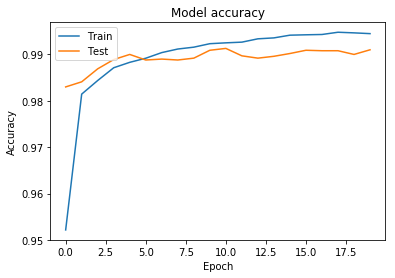

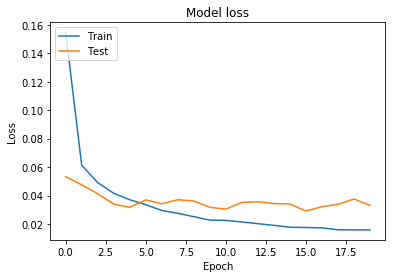

In [49]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating model and storing score in a variable.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing loss and accuracy of model test done in last step

In [51]:
print(score)

[0.033013972325337454, 0.991]


Predicting out put for test inputs

In [0]:
y_pred = model.predict(X_test)

Printing prediction and test out puts 

In [53]:
print(y_pred[:9])
print(y_test[:9])

[[3.90180264e-15 6.32702712e-13 2.15908784e-11 1.34800937e-09
  2.52756791e-15 1.61958771e-12 1.12426626e-22 1.00000000e+00
  9.06182193e-13 1.22927961e-08]
 [1.44117811e-08 1.31978175e-06 9.99997973e-01 2.77140342e-11
  3.09296859e-11 2.56440008e-15 6.60520243e-07 1.29908185e-11
  2.87033597e-09 8.77937445e-11]
 [4.48715731e-08 9.99968410e-01 2.88818427e-07 6.01701888e-09
  1.92014231e-05 6.57252144e-07 3.28946044e-07 4.68177092e-07
  1.06764219e-05 5.75143178e-09]
 [9.99986649e-01 7.59207743e-15 1.55108322e-11 1.63289120e-12
  3.69320928e-11 8.65661653e-10 1.29351047e-05 7.38366104e-11
  4.05481835e-08 3.42082416e-07]
 [1.49240842e-10 7.58698592e-14 2.53516652e-12 9.52408293e-16
  9.99998093e-01 1.16253394e-12 1.33751961e-12 3.43248541e-10
  3.42669324e-08 1.85696058e-06]
 [7.42359785e-10 9.99974966e-01 1.98679135e-08 1.86794625e-11
  1.06840607e-05 8.59100124e-10 3.69004360e-09 5.96662221e-06
  8.27113308e-06 1.83325994e-08]
 [3.17795602e-15 8.64421157e-09 2.29702628e-11 1.18393370e

In [44]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_5': <keras.layers.core.Activation at 0x7f1a56d0af98>,
 'batch_normalization_40': <keras.layers.normalization.BatchNormalization at 0x7f1a9c2150f0>,
 'batch_normalization_41': <keras.layers.normalization.BatchNormalization at 0x7f1a5747d358>,
 'batch_normalization_42': <keras.layers.normalization.BatchNormalization at 0x7f1a570a4ba8>,
 'batch_normalization_43': <keras.layers.normalization.BatchNormalization at 0x7f1a56e848d0>,
 'conv2d_45': <keras.layers.convolutional.Conv2D at 0x7f1a9c2152b0>,
 'conv2d_46': <keras.layers.convolutional.Conv2D at 0x7f1a570ef320>,
 'conv2d_47': <keras.layers.convolutional.Conv2D at 0x7f1a56fede80>,
 'conv2d_48': <keras.layers.convolutional.Conv2D at 0x7f1a56f59518>,
 'conv2d_49': <keras.layers.convolutional.Conv2D at 0x7f1a56d847f0>,
 'conv2d_50': <keras.layers.convolutional.Conv2D at 0x7f1a56e4f5c0>,
 'dropout_7': <keras.layers.core.Dropout at 0x7f1a56eecf98>,
 'dropout_8': <keras.layers.core.Dropout at 0x7f1a56da8e48>,
 'flatten_5': <keras.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()